In [221]:
import pandas as pd
df = pd.read_csv("bollywood.csv")
import seaborn as sns
import matplotlib.pyplot as plt

In [222]:
#bollywood dataset
df

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
...,...,...,...,...,...,...,...,...,...,...
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762


In [223]:
#1. How many records are present in the dataset
df.shape

(149, 10)

In [224]:
#2. How many movies got released in each genre? Sort number of releases in each genre in descending order.
q2=df.groupby('Genre')['SlNo'].count()
q2.sort_values(ascending=False)



Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: SlNo, dtype: int64

In [225]:
#3. Which genre had highest number of releases?
df["Genre"]=df["Genre"].str.strip()
df['Genre'].value_counts()


Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [226]:
#4. How many movies in each genre got released in different release times like long weekend, festive season, etc.
pd.crosstab(df["Genre"],df["ReleaseTime"])


ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [227]:
#5. Which month of the year, maximum number movie releases are seen?
df['date'] = pd.to_datetime(df['Release Date'])
df['Month'] = pd. DatetimeIndex(df['date']).month
df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,date,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,2014-04-18,4
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,2013-01-04,1
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,2014-07-18,7
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,2013-01-04,1
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,2014-07-04,7


In [228]:
releases=df.groupby('Month')['SlNo'].count()
releases.sort_values(ascending=False)
releases.iloc[0:1]

Month
1    20
Name: SlNo, dtype: int64

In [229]:
#6.Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?
budget25=df[df['Budget']>=25]
budget25["Month"].max()
varMonth25=pd.crosstab(budget25['Month'],budget25['Budget'].count())
varMonth25.iloc[1:2]



col_0,66
Month,
2,9


In [230]:
#7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
df['ROI']=(df['BoxOfficeCollection']-df['Budget'])/df['Budget']
varROI=df[['MovieName','ROI']].sort_values(by='ROI',ascending=False)
varROI.head(10)

,MovieName,ROI
64,Aashiqui 2,8.166667
89,PK,7.647059
132,Grand Masti,7.514286
135,The Lunchbox,7.500000
87,Fukrey,6.240000
58,Mary Kom,5.933333
128,Shahid,5.666667
37,Humpty Sharma Ki Dulhania,5.500000
101,Bhaag Milkha Bhaag,4.466667
115,Chennai Express,4.266667


In [231]:
#8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.
df.groupby("ReleaseTime")['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [232]:
#9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
df["BoxOfficeCollection"].corr(df["YoutubeLikes"])

0.6825165877731297

<AxesSubplot:title={'center':'YoutubeViews'}, xlabel='Genre'>

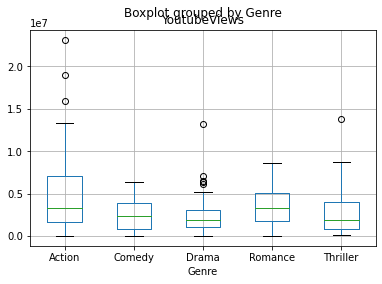

In [233]:
#10. Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare
df.boxplot(column="YoutubeViews",by="Genre")

<AxesSubplot:>

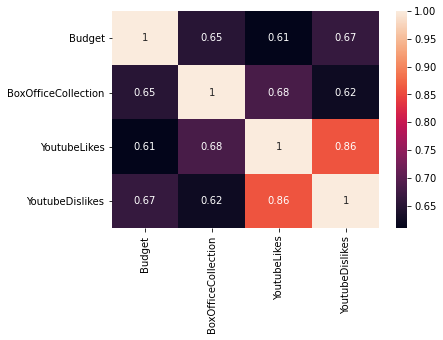

In [234]:
#11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated?
newdf=df.filter(["Budget","BoxOfficeCollection","YoutubeView","YoutubeLikes","YoutubeDislikes"],axis=1)
cordf=newdf.corr()
sns.heatmap(cordf, annot=True)

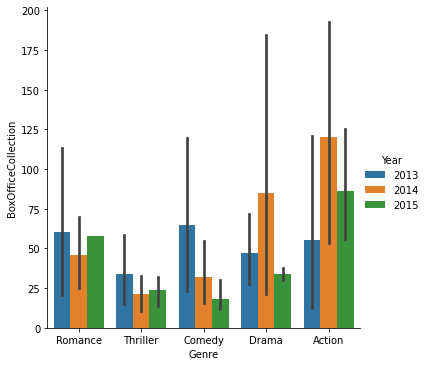

In [248]:
#12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph
df['Year'] = pd. DatetimeIndex(df['date']).year
sns.catplot(x="Genre", y="BoxOfficeCollection", hue="Year", data=df, kind="bar");

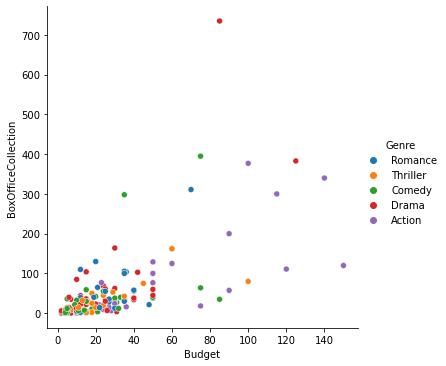

In [256]:
#13. Visualize the Budget and Box office collection based on Genre
sns.relplot(x="Budget", y="BoxOfficeCollection", hue="Genre", data=df);

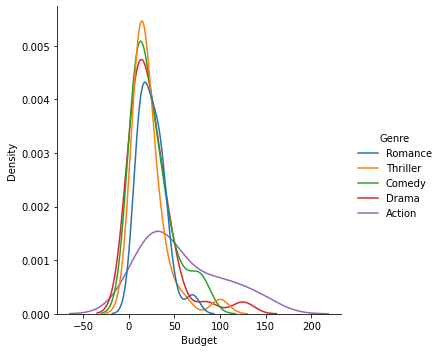

In [262]:
#14 Find the distribution of movie budget for every Genre.
sns.displot(df, x="Budget", hue="Genre",kind ="kde")

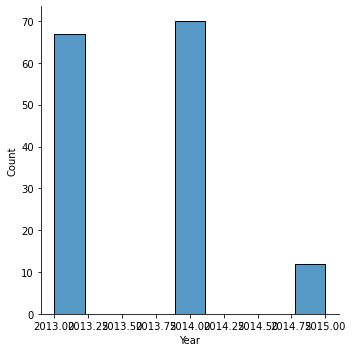

In [267]:
#15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph.
sns.displot(df, x="Year")